In [2]:
import math
import matplotlib.pyplot as plt

In [3]:
import physics as ph
import aux
import myplot as mypl

In [4]:
outputpath = aux.COMMON_OUTPUT_PATH

In [5]:
def brsALP(Lambda,filename,br=True,lower=2*10**-4,bboxX=0.18):
    with aux.HiddenPrints():
        maList = list((i*10**(exp-2) for exp in range(-3, 3) for i in range(10, 100)))
        brs = [[],[],[],[],[],[],[],[]]
        maPlotList = []
        for ma in maList:
            if ma >= 92:
                break
            maPlotList.append(ma)
            if ma<1:
                mu = 1
            else:
                mu=ma
            lscs = ph.getLSfromctt(1/2,1/2, Lambda, mu)
            brs[0].append(ph.Gammaatoll(ma,ph.readCee(lscs),ph.sm['me'],Lambda))
            brs[1].append(ph.Gammaatoll(ma,ph.readCmumu(lscs),ph.sm['mmu'],Lambda))
            try:
                ctautau = ph.readCtautau(lscs)
            except IndexError:
                ctautau = 0
            brs[2].append(ph.Gammaatoll(ma,ctautau,ph.sm['mtau'],Lambda))
            try:
                ccc = ph.readCcc(lscs)
            except IndexError:
                ccc = 0
            brs[3].append(ph.Gammaatoqq(ma,ccc,ph.sm['mc'],Lambda))
            try:
                cbb = ph.readCbb(lscs)
            except IndexError:
                cbb = 0
            brs[4].append(ph.Gammaatoqq(ma,cbb,ph.sm['mb'],Lambda))
            brs[5].append(ph.Gammaatogamgam(ma,lscs,Lambda))
            brs[6].append(ph.Gammaatohad(ma,lscs,Lambda)+ph.Gammaato3pi000(ma,lscs,Lambda)+ph.Gammaato3pi0pm(ma,lscs,Lambda))
            brs[7].append(brs[0][-1]+brs[1][-1]+brs[2][-1]+brs[3][-1]+brs[4][-1]+brs[5][-1]+brs[6][-1])
            if (br and brs[7][-1] != 0):
                brs[0][-1] = brs[0][-1]/brs[7][-1]
                brs[1][-1] = brs[1][-1]/brs[7][-1]
                brs[2][-1] = brs[2][-1]/brs[7][-1]
                brs[3][-1] = brs[3][-1]/brs[7][-1]
                brs[4][-1] = brs[4][-1]/brs[7][-1]
                brs[5][-1] = brs[5][-1]/brs[7][-1]
                brs[6][-1] = brs[6][-1]/brs[7][-1]
        fig, ax = plt.subplots() 
        ax.set_xscale('log')
        ax.set_yscale('log')
        ax.set_xlabel(r'$m_a$ [GeV]')
        if (br):
            ax.set_ylim([lower,2.5])
            ax.set_xlim([maPlotList[0],maPlotList[-1]])
            ax.set_ylabel(r'$\mathcal{B}(a\to X)$')
            ax.plot([maPlotList[0],maPlotList[-1]],[1,1],ls=':',color=mypl.coloursX(1,1)[0]) 
        else:
            ax.set_xlim([maPlotList[0],maPlotList[-1]])
            ax.plot(maPlotList,brs[7],color=mypl.coloursX(1,1)[0]) 
            ax.set_ylabel(r'Decay rate $\Gamma(a\to X)$')
        ax.plot(maPlotList,brs[0],label=r'$e^+e^-$',color=mypl.coloursX(1,8)[0]) 
        ax.plot(maPlotList,brs[1],label=r'$\mu^+\mu^-$',color=mypl.coloursX(1,8)[1]) 
        ax.plot(maPlotList,brs[2],label=r'$\tau^+\tau^-$',color=mypl.coloursX(1,8)[2]) 
        ax.plot(maPlotList,brs[3],label=r'$c\bar{c}$',color=mypl.coloursX(1,8)[3]) 
        ax.plot(maPlotList,brs[4],label=r'$b\bar{b}$',color=mypl.coloursX(1,8)[4])
        ax.plot(maPlotList,brs[5],label=r'$\gamma\gamma$',color=mypl.coloursX(1,8)[5]) 
        ax.plot(maPlotList,brs[6],label='hadr.',color=mypl.coloursX(1,8)[6]) 
        if (br):
            ax.legend(loc='upper left', handlelength=0.7,bbox_to_anchor=(bboxX, 0.9))
        else:
            ax.legend(loc='upper left', handlelength=0.7)
    if filename !="":
        plt.savefig(filename)
    plt.show()

/pfs/data5/home/hd/hd_hd/hd_cu194/ttalps/physics.py:181: ComplexWarning: Casting complex values to real discards the imaginary part
  return float(gamma)
/pfs/data5/home/hd/hd_hd/hd_cu194/ttalps/physics.py:233: ComplexWarning: Casting complex values to real discards the imaginary part
  return float(gamma)
/pfs/data5/home/hd/hd_hd/hd_cu194/ttalps/physics.py:252: ComplexWarning: Casting complex values to real discards the imaginary part
  return float(gamma)
/pfs/data5/home/hd/hd_hd/hd_cu194/ttalps/physics.py:214: ComplexWarning: Casting complex values to real discards the imaginary part
  return float(gamma)


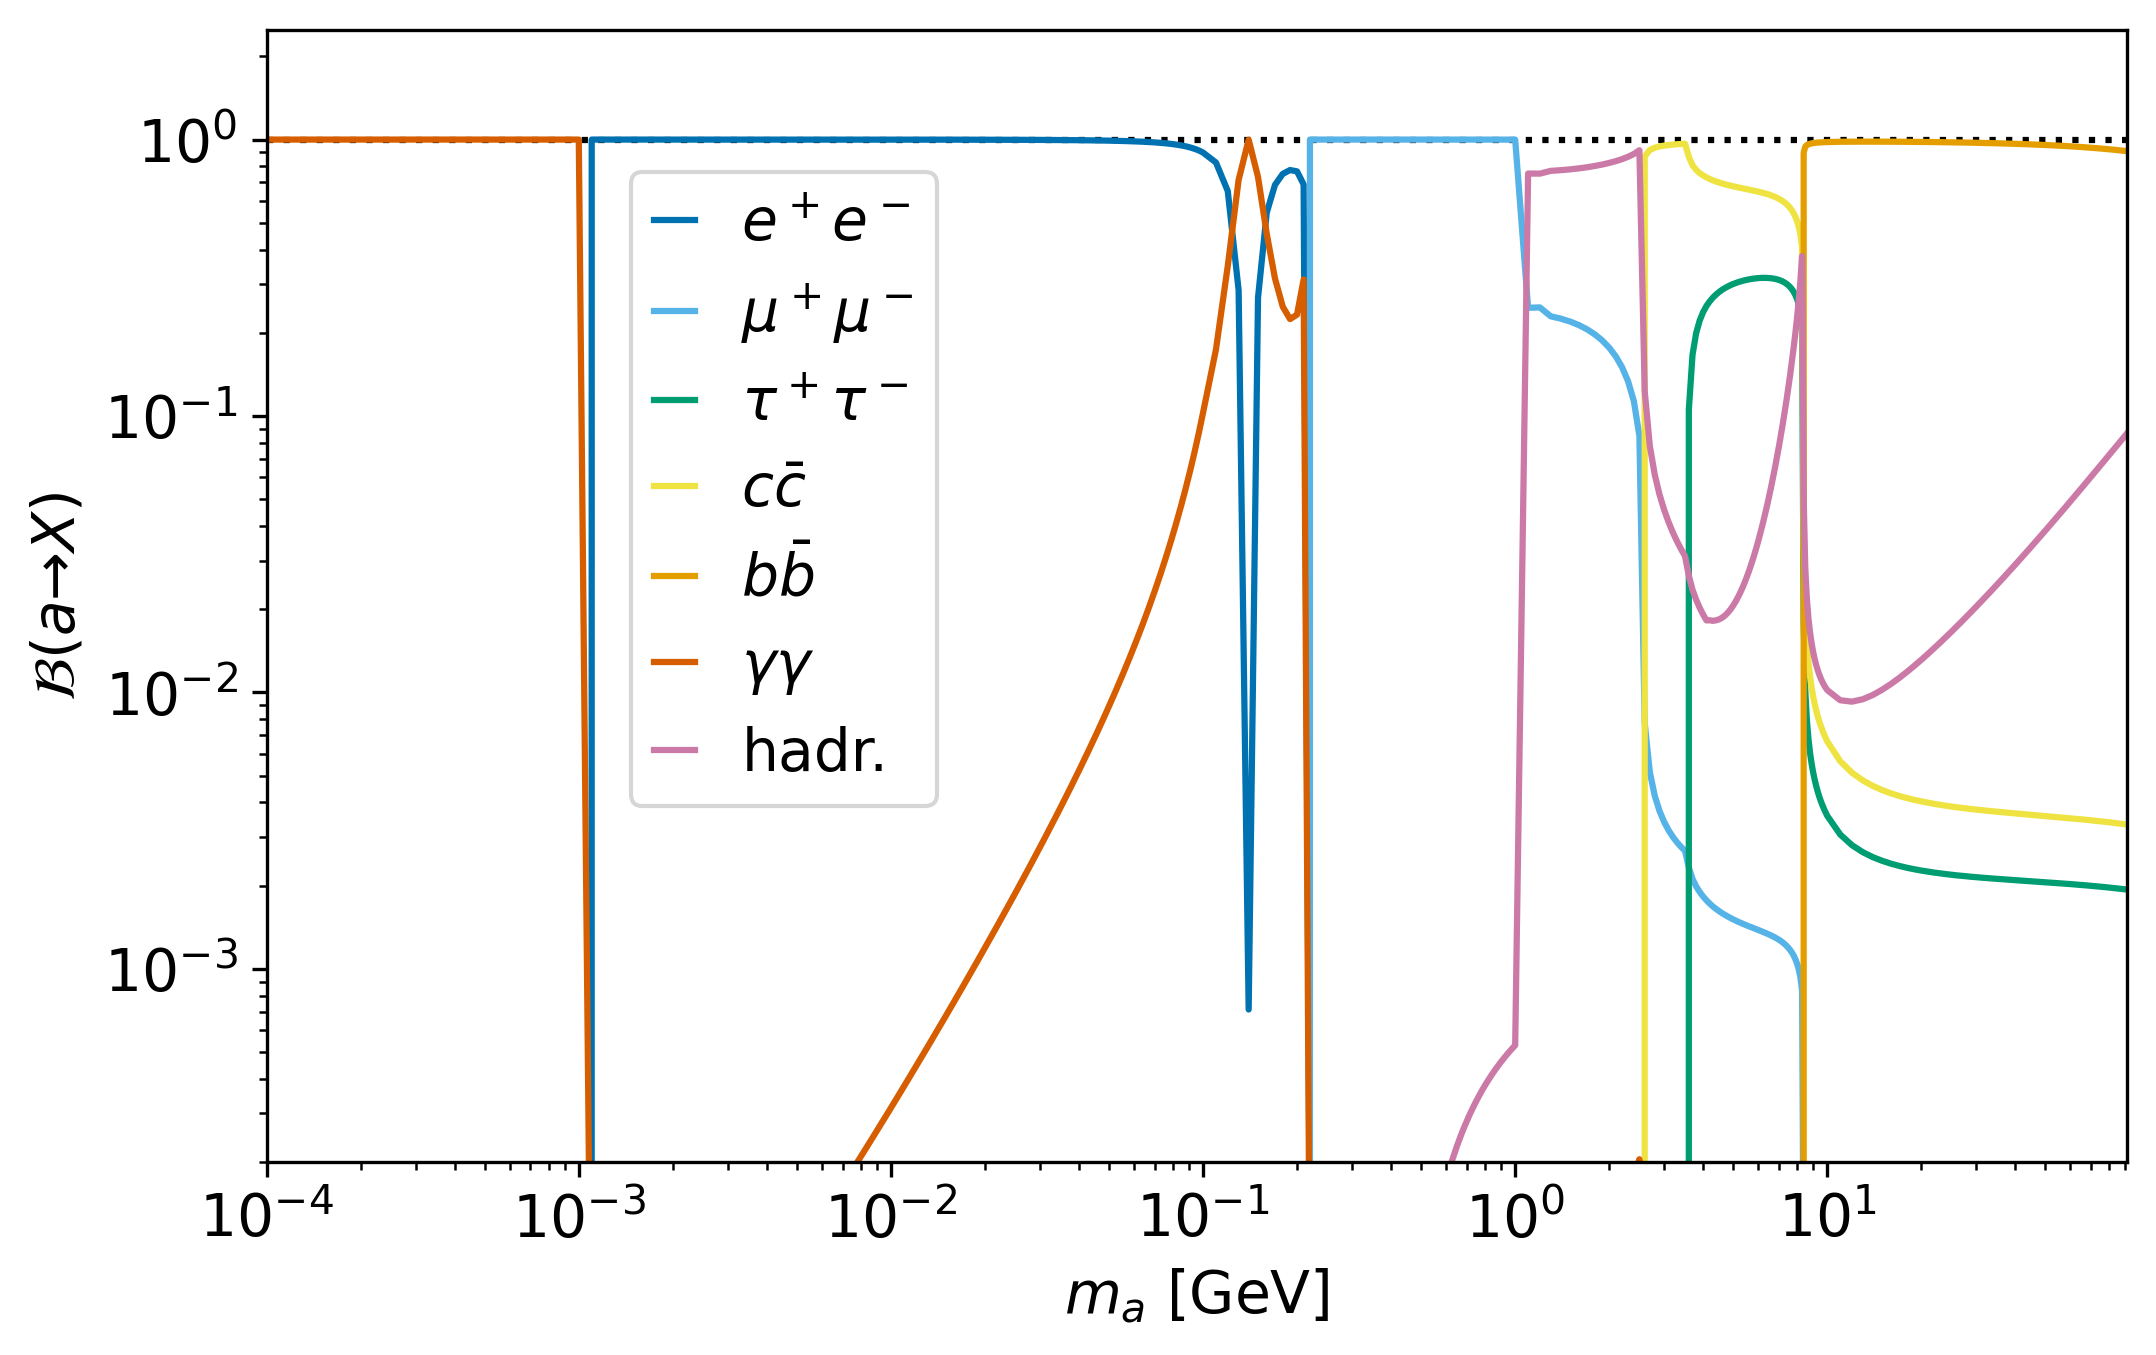

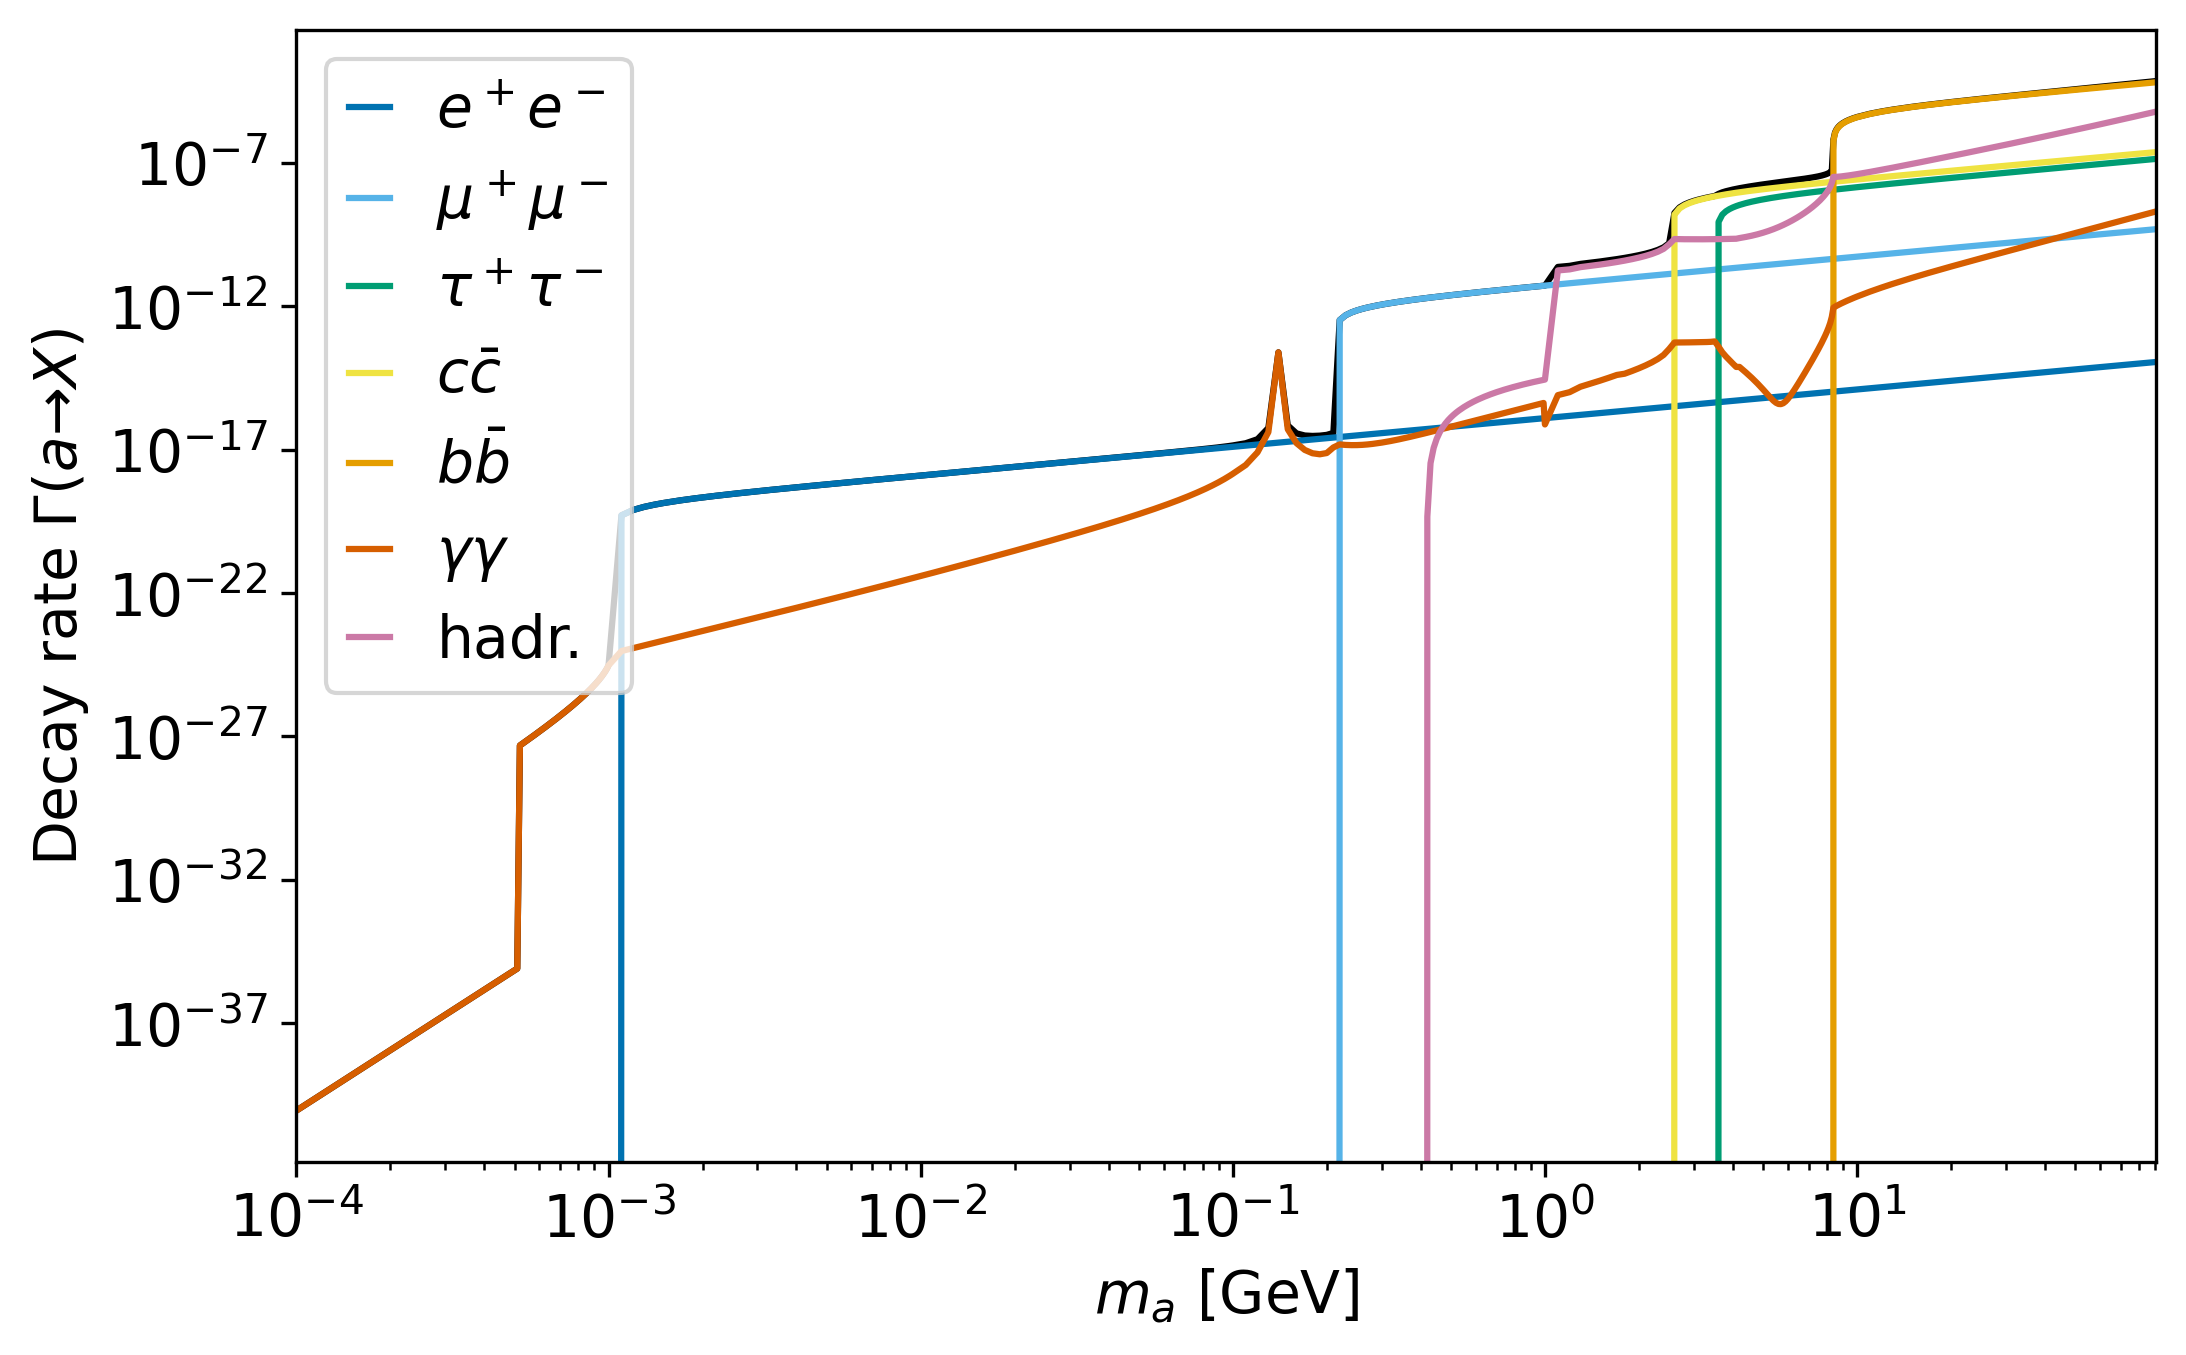

In [5]:
brsALP(4000*math.pi,outputpath+"branchingRatio.png",bboxX=0.18)
brsALP(4000*math.pi,outputpath+"decayWidth.png",br=False)

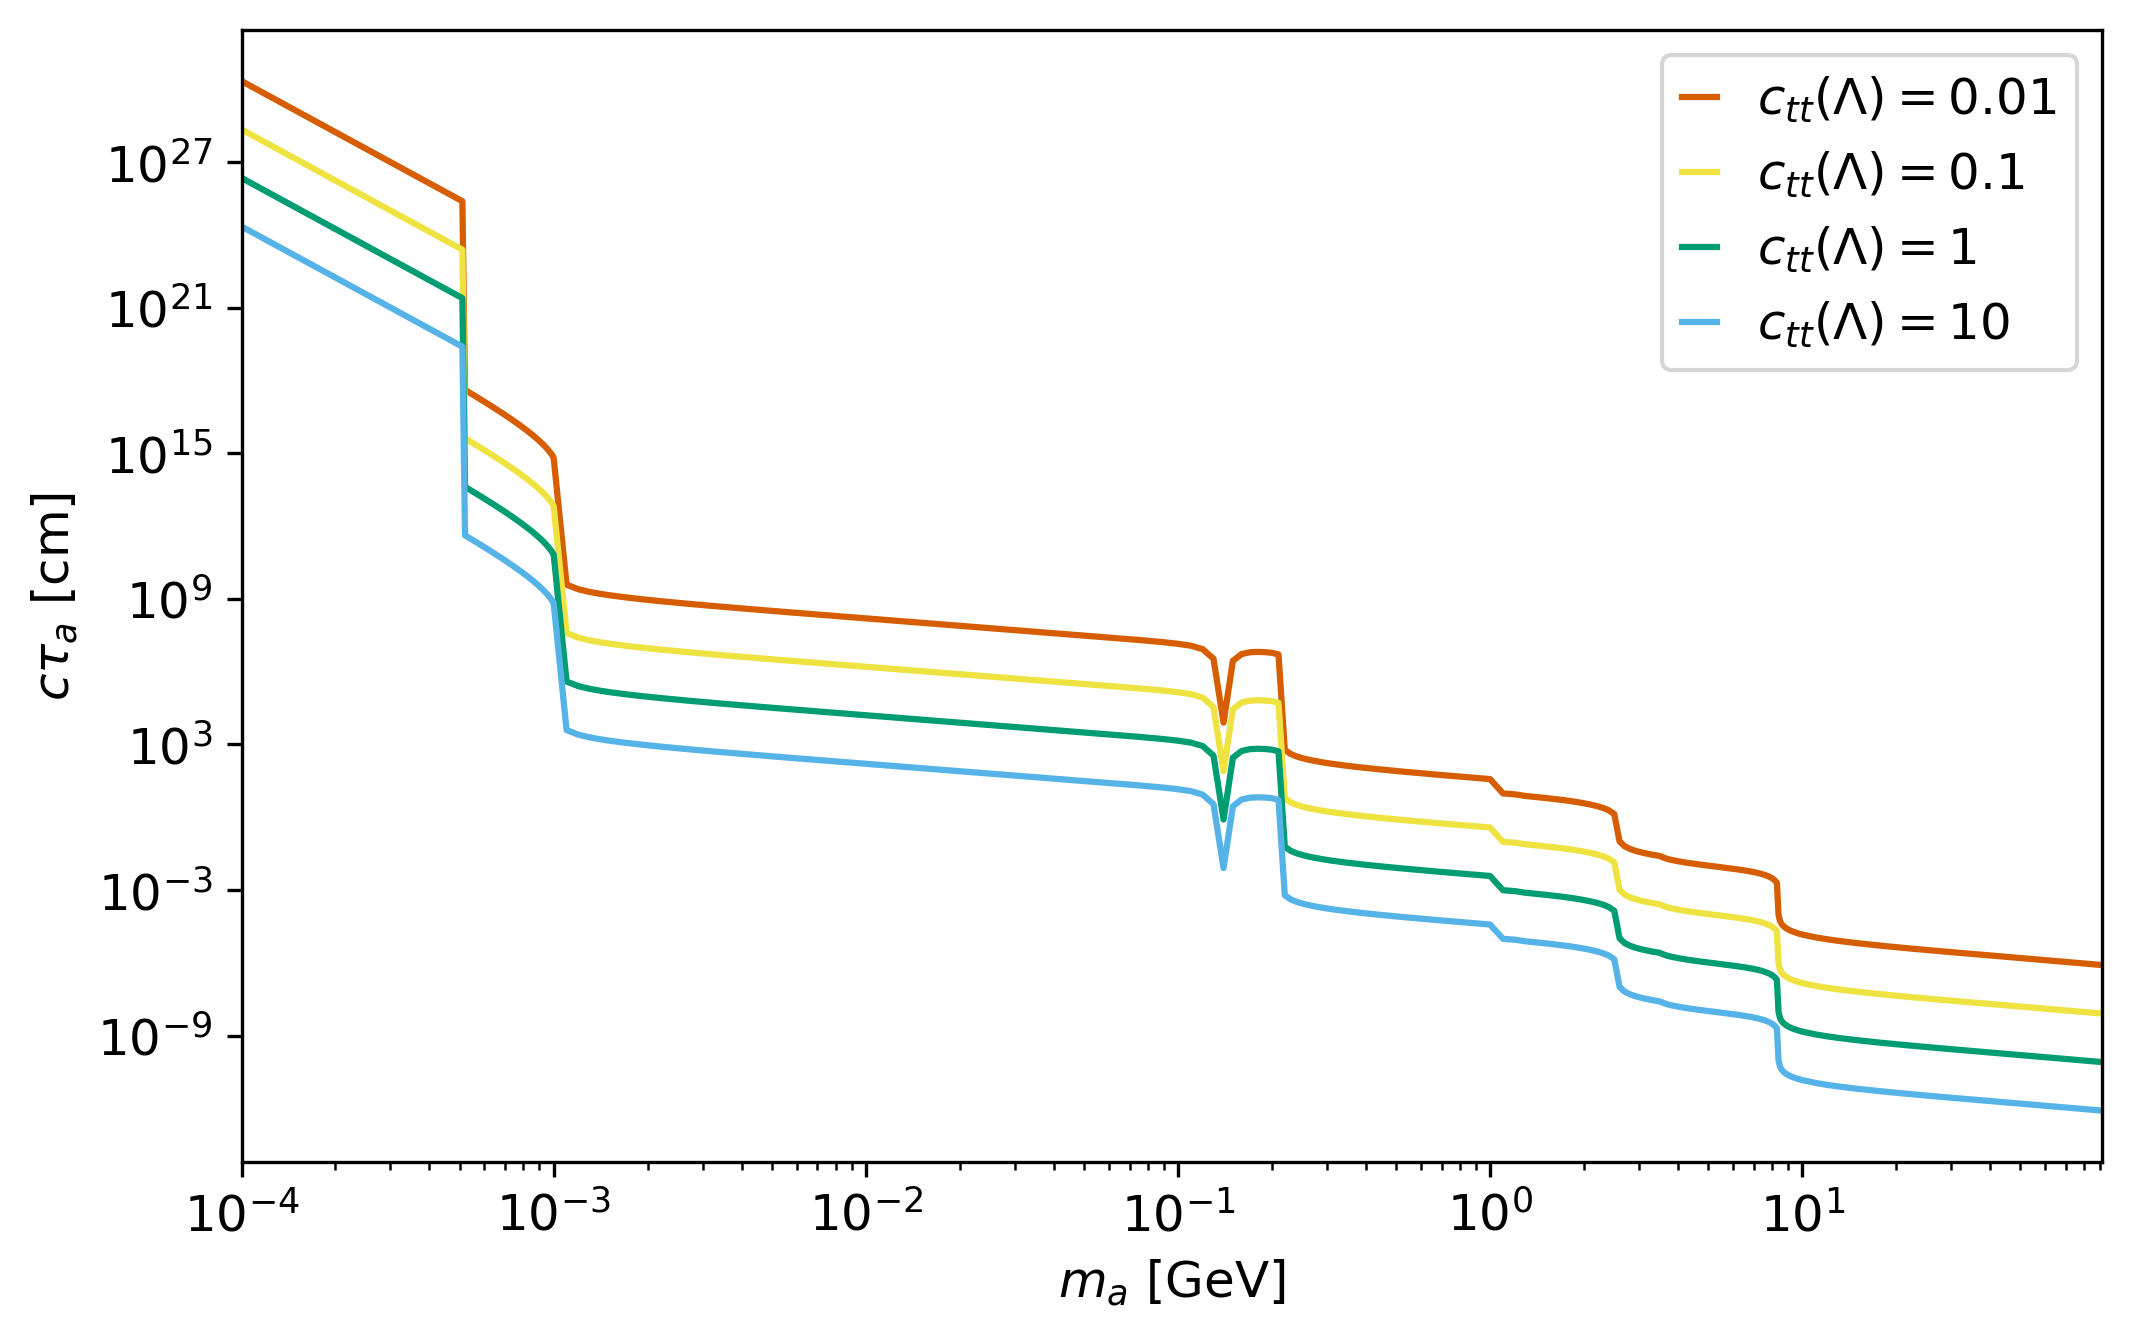

In [6]:
plt.rcParams.update({'font.size': 12})
with aux.HiddenPrints():
    maList = list((i*10**(exp-2) for exp in range(-3, 4) for i in range(10, 100)))
    ctaus = [[],[],[],[]]
    maPlotList = []
    for ma in maList:
        if ma >= 92:
            break
        maPlotList.append(ma)
        ctaus[0].append(ph.ctaua(ma, 10,0, 4 * math.pi *1000))
        ctaus[1].append(ph.ctaua(ma, 1,0, 4 * math.pi *1000))
        ctaus[2].append(ph.ctaua(ma, 0.1,0, 4 * math.pi *1000))
        ctaus[3].append(ph.ctaua(ma, 0.01,0, 4 * math.pi *1000))
    fig, ax = plt.subplots() 
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel(r'$m_a$ [GeV]')
    ax.set_ylabel(r'$c\tau_a$ [cm]')
    ax.plot(maPlotList,ctaus[3],color=mypl.coloursX(1,4)[3],label=r"$c_{tt}(\Lambda)=0.01$")
    ax.plot(maPlotList,ctaus[2],color=mypl.coloursX(1,4)[2],label=r"$c_{tt}(\Lambda)=0.1$")
    ax.plot(maPlotList,ctaus[1],color=mypl.coloursX(1,4)[1],label=r"$c_{tt}(\Lambda)=1$")
    ax.plot(maPlotList,ctaus[0],color=mypl.coloursX(1,4)[0],label=r"$c_{tt}(\Lambda)=10$")
    ax.set_xlim([maPlotList[0],maPlotList[-1]])
    plt.legend(handlelength=0.7)
plt.savefig(outputpath+"lifetimes.png")
plt.show()

/pfs/data5/home/hd/hd_hd/hd_cu194/ttalps/physics.py:181: ComplexWarning: Casting complex values to real discards the imaginary part
  return float(gamma)
/pfs/data5/home/hd/hd_hd/hd_cu194/ttalps/physics.py:233: ComplexWarning: Casting complex values to real discards the imaginary part
  return float(gamma)
/pfs/data5/home/hd/hd_hd/hd_cu194/ttalps/physics.py:252: ComplexWarning: Casting complex values to real discards the imaginary part
  return float(gamma)
/pfs/data5/home/hd/hd_hd/hd_cu194/ttalps/physics.py:214: ComplexWarning: Casting complex values to real discards the imaginary part
  return float(gamma)


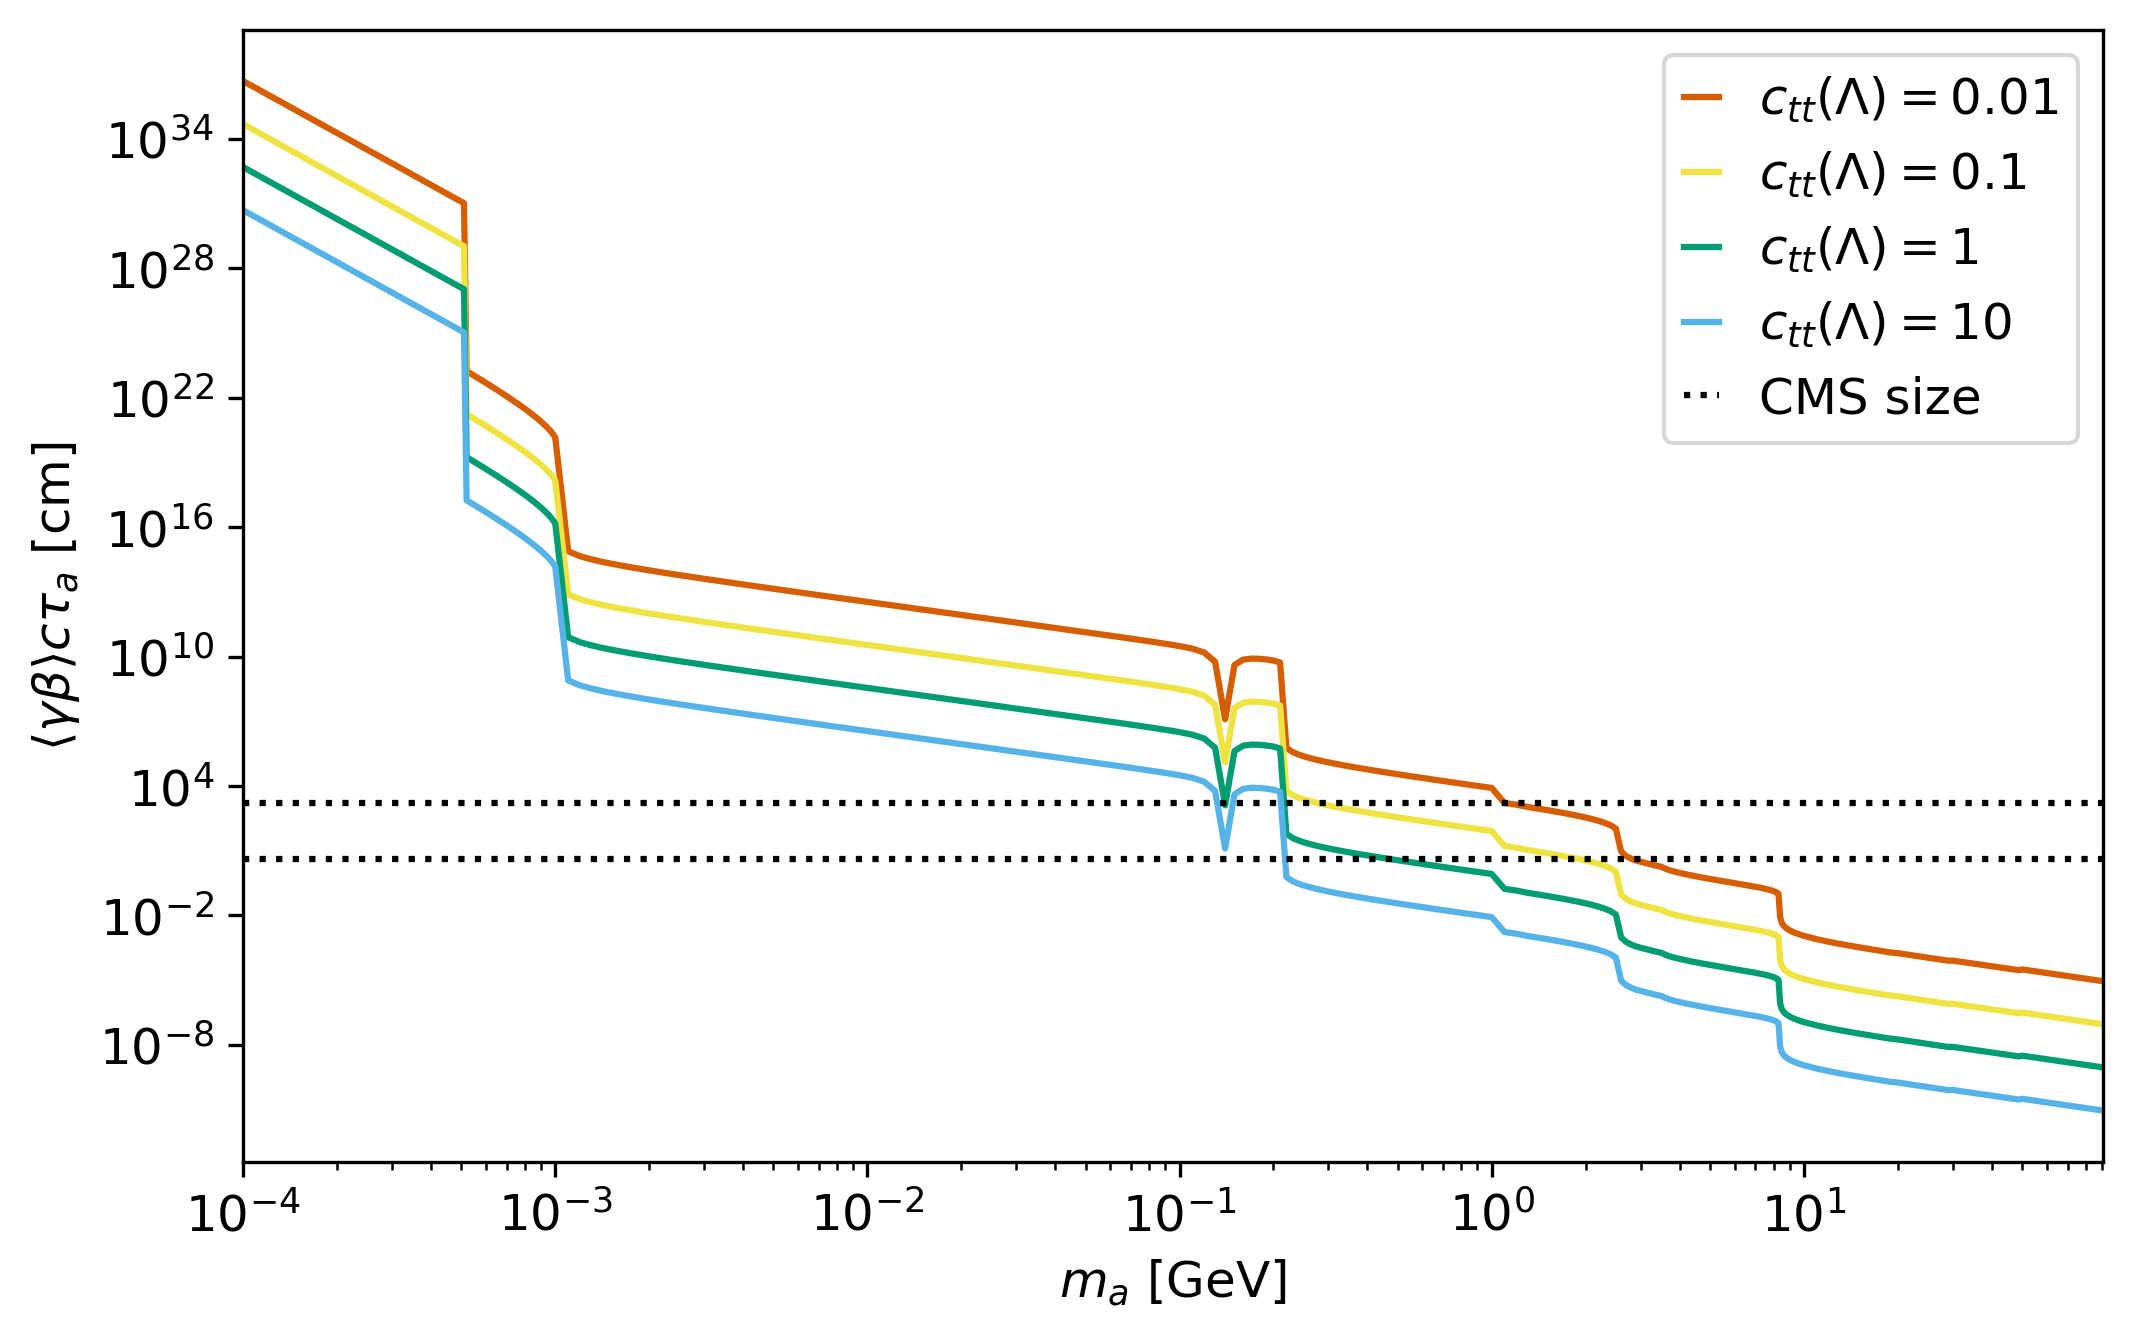

In [6]:
# Note: The <p> comes from the boosts in kinematics.ipynb
plt.rcParams.update({'font.size': 12})
with aux.HiddenPrints():
    maList = list((i*10**(exp-2) for exp in range(-3, 4) for i in range(10, 100)))
    gbctaus = [[],[],[],[]]
    maPlotList = []
    for ma in maList:
        if ma >= 92:
            break
        maPlotList.append(ma)
        if ma<3:
            p = 223
        elif ma<20:
            p = 230
        elif ma<30:
            p = 240
        elif ma<50:
            p = 260
        else:
            p = 296
        gbctaus[0].append(ph.ctaua(ma, 10/2, 10/2, 4 * math.pi *1000)*p/ma)
        gbctaus[1].append(ph.ctaua(ma, 1/2, 1/2, 4 * math.pi *1000)*p/ma)
        gbctaus[2].append(ph.ctaua(ma, 0.1/2, 0.1/2, 4 * math.pi *1000)*p/ma)
        gbctaus[3].append(ph.ctaua(ma, 0.01/2, 0.01/2, 4 * math.pi *1000)*p/ma)
    fig, ax = plt.subplots() 
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel(r'$m_a$ [GeV]')
    ax.set_ylabel(r'$\langle\gamma\beta\rangle c\tau_a$ [cm]')
    ax.plot(maPlotList,gbctaus[3],color=mypl.coloursX(1,4)[3],label=r"$c_{tt}(\Lambda)=0.01$")
    ax.plot(maPlotList,gbctaus[2],color=mypl.coloursX(1,4)[2],label=r"$c_{tt}(\Lambda)=0.1$")
    ax.plot(maPlotList,gbctaus[1],color=mypl.coloursX(1,4)[1],label=r"$c_{tt}(\Lambda)=1$")
    ax.plot(maPlotList,gbctaus[0],color=mypl.coloursX(1,4)[0],label=r"$c_{tt}(\Lambda)=10$")
    ax.axhline(y=4,ls=':',c=mypl.coloursX(1,1)[0],label=r"CMS size")
    ax.axhline(y=1619,ls=':',c=mypl.coloursX(1,1)[0])
    ax.set_xlim([maPlotList[0],maPlotList[-1]])
    plt.legend(handlelength=0.7)
plt.savefig(outputpath+"decayLengths.png")
plt.show()

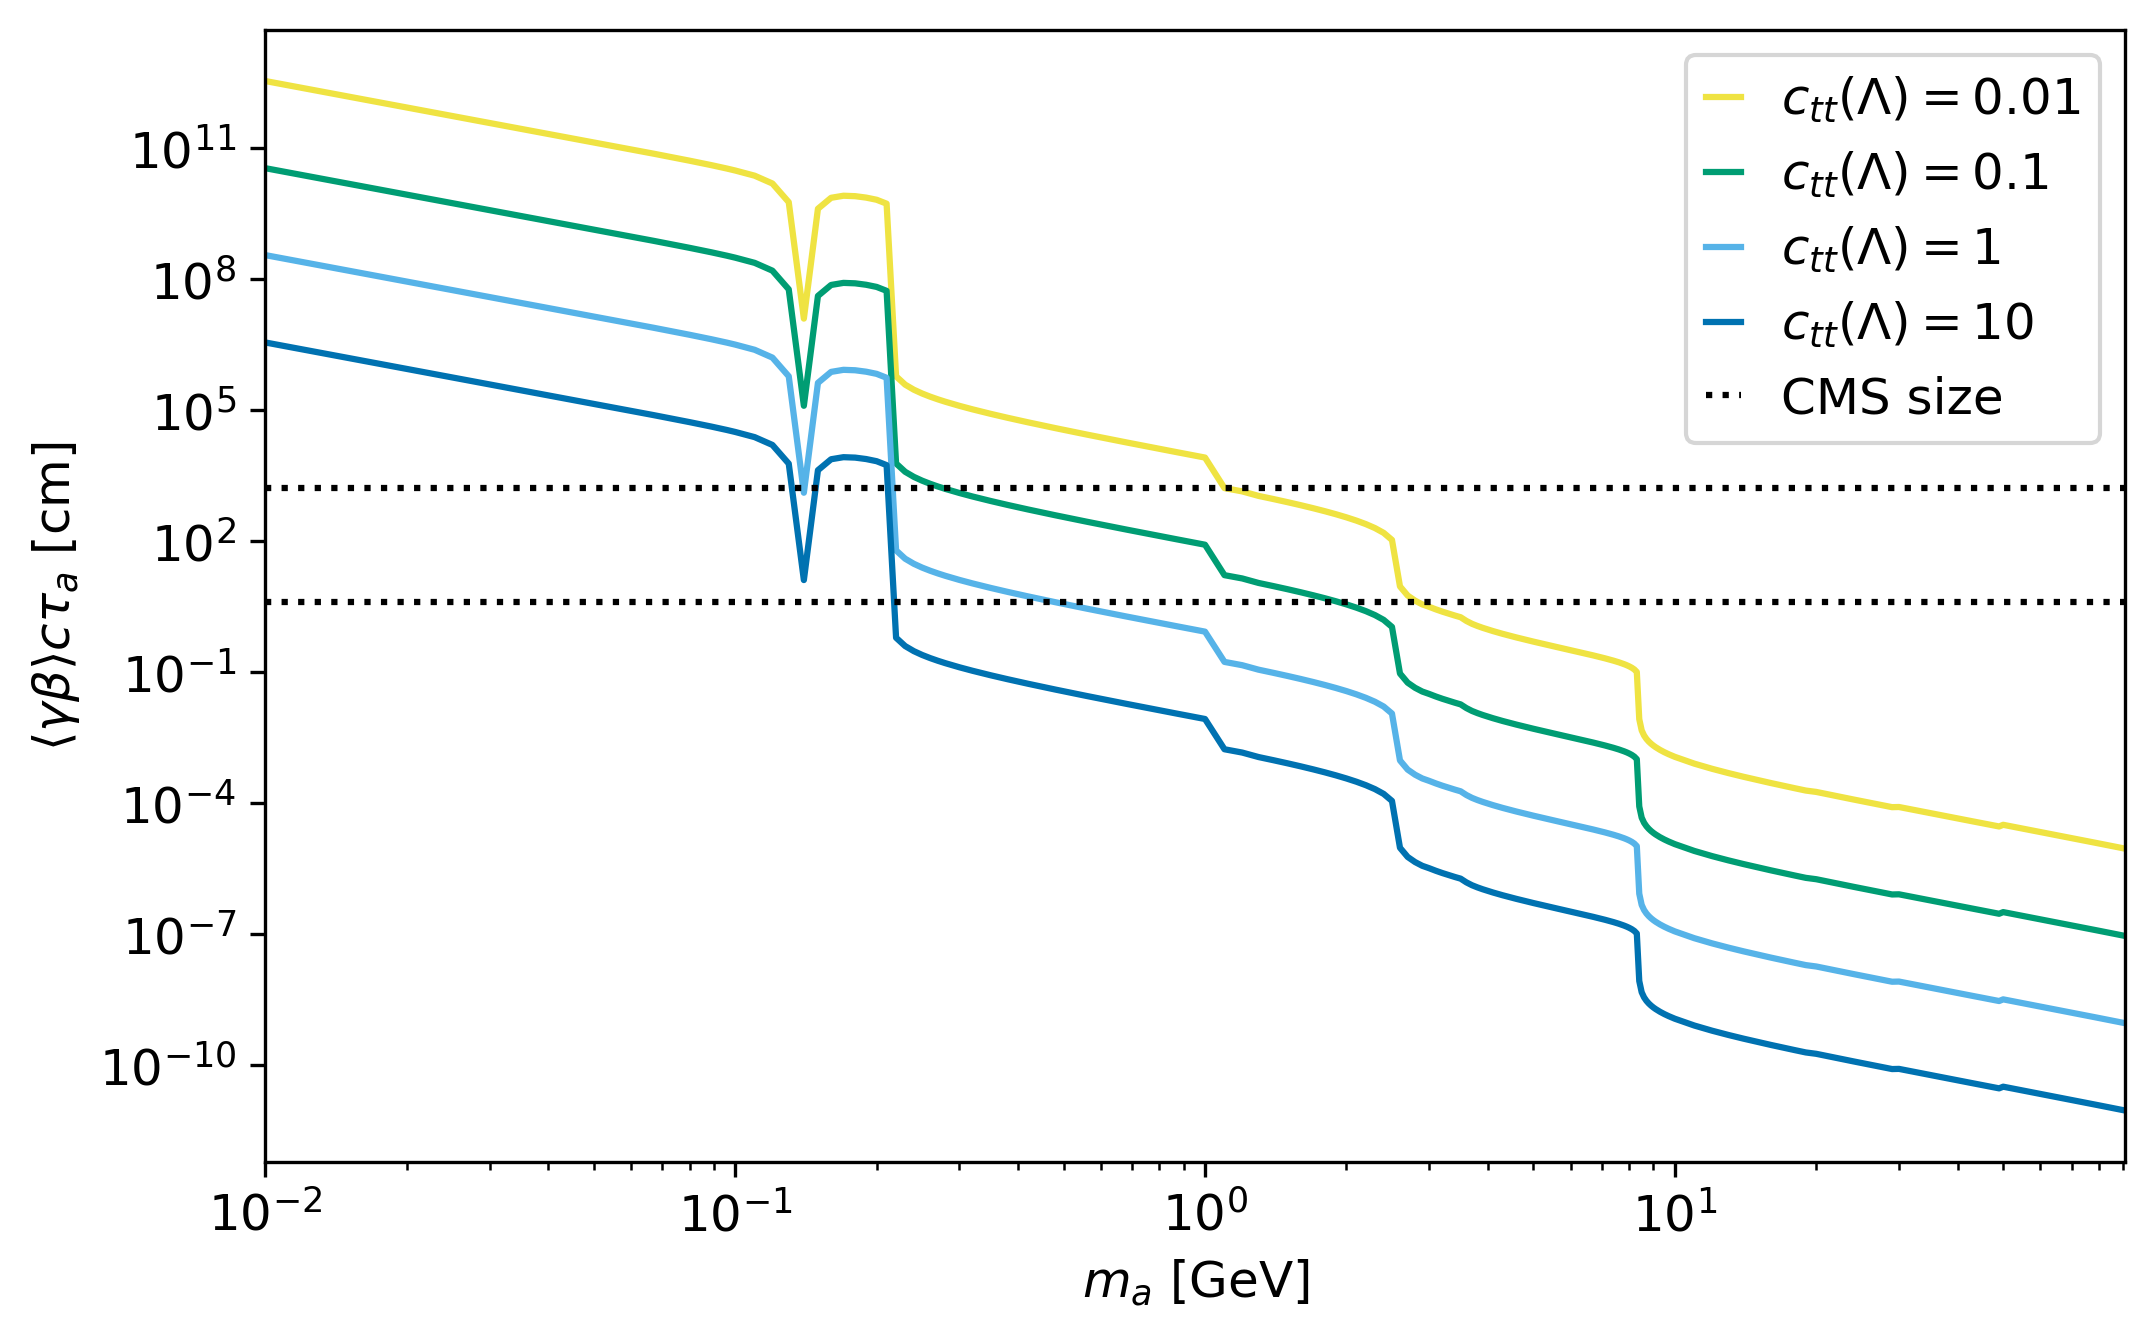

In [6]:
# Note: The <p> comes from the boosts in kinematics.ipynb
plt.rcParams.update({'font.size': 12})
with aux.HiddenPrints():
    maList = list((i*10**(exp-2) for exp in range(-1, 4) for i in range(10, 100)))
    gbctaus = [[],[],[],[]]
    maPlotList = []
    for ma in maList:
        if ma >= 92:
            break
        maPlotList.append(ma)
        if ma<3:
            p = 223
        elif ma<20:
            p = 230
        elif ma<30:
            p = 240
        elif ma<50:
            p = 260
        else:
            p = 296
        gbctaus[0].append(ph.ctaua(ma, 10/2, 10/2, 4 * math.pi *1000)*p/ma)
        gbctaus[1].append(ph.ctaua(ma, 1/2, 1/2, 4 * math.pi *1000)*p/ma)
        gbctaus[2].append(ph.ctaua(ma, 0.1/2, 0.1/2, 4 * math.pi *1000)*p/ma)
        gbctaus[3].append(ph.ctaua(ma, 0.01/2, 0.01/2, 4 * math.pi *1000)*p/ma)
    fig, ax = plt.subplots() 
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel(r'$m_a$ [GeV]')
    ax.set_ylabel(r'$\langle\gamma\beta\rangle c\tau_a$ [cm]')
    ax.plot(maPlotList,gbctaus[3],color=mypl.coloursX(1,4)[3],label=r"$c_{tt}(\Lambda)=0.01$")
    ax.plot(maPlotList,gbctaus[2],color=mypl.coloursX(1,4)[2],label=r"$c_{tt}(\Lambda)=0.1$")
    ax.plot(maPlotList,gbctaus[1],color=mypl.coloursX(1,4)[1],label=r"$c_{tt}(\Lambda)=1$")
    ax.plot(maPlotList,gbctaus[0],color=mypl.coloursX(1,4)[0],label=r"$c_{tt}(\Lambda)=10$")
    ax.axhline(y=4,ls=':',c=mypl.coloursX(1,1)[0],label=r"CMS size")
    ax.axhline(y=1619,ls=':',c=mypl.coloursX(1,1)[0])
    ax.set_xlim([maPlotList[0],maPlotList[-1]])
    plt.legend(handlelength=0.7)
plt.savefig(outputpath+"decayLengths.png")
plt.show()